In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data_path = mne.datasets.sample.data_path()
print(data_path)
raw = mne.io.read_raw_fif(data_path+'/MEG/sample/sample_audvis_raw.fif',preload=True)
raw

/home/reallocing/mne_data/MNE-sample-data
Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~482.3 MB, data loaded>

In [38]:
raw.filter(1,40)

Setting up band-pass filter from 1 - 40 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 10.0 Hz
Filter length of 1983 samples (3.302 sec) selected


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~482.3 MB, data loaded>

In [10]:
print raw.ch_names,
print("Length:",len(raw.ch_names))

[u'MEG 0113', u'MEG 0112', u'MEG 0111', u'MEG 0122', u'MEG 0123', u'MEG 0121', u'MEG 0132', u'MEG 0133', u'MEG 0131', u'MEG 0143', u'MEG 0142', u'MEG 0141', u'MEG 0213', u'MEG 0212', u'MEG 0211', u'MEG 0222', u'MEG 0223', u'MEG 0221', u'MEG 0232', u'MEG 0233', u'MEG 0231', u'MEG 0243', u'MEG 0242', u'MEG 0241', u'MEG 0313', u'MEG 0312', u'MEG 0311', u'MEG 0322', u'MEG 0323', u'MEG 0321', u'MEG 0333', u'MEG 0332', u'MEG 0331', u'MEG 0343', u'MEG 0342', u'MEG 0341', u'MEG 0413', u'MEG 0412', u'MEG 0411', u'MEG 0422', u'MEG 0423', u'MEG 0421', u'MEG 0432', u'MEG 0433', u'MEG 0431', u'MEG 0443', u'MEG 0442', u'MEG 0441', u'MEG 0513', u'MEG 0512', u'MEG 0511', u'MEG 0523', u'MEG 0522', u'MEG 0521', u'MEG 0532', u'MEG 0533', u'MEG 0531', u'MEG 0542', u'MEG 0543', u'MEG 0541', u'MEG 0613', u'MEG 0612', u'MEG 0611', u'MEG 0622', u'MEG 0623', u'MEG 0621', u'MEG 0633', u'MEG 0632', u'MEG 0631', u'MEG 0642', u'MEG 0643', u'MEG 0641', u'MEG 0713', u'MEG 0712', u'MEG 0711', u'MEG 0723', u'MEG 0722'

In [47]:
for i,v in enumerate(raw.ch_names):
    if v == 'MEG 1711':
        print(i,v)

(188, u'MEG 1711')


In [48]:
order = np.arange(raw.info['nchan'])
order[9] = 375
order[375] = 9
order[0] = 152
order[152] = 0
order[1] = 155
order[155] = 1
order[2] = 188
order[188] = 2

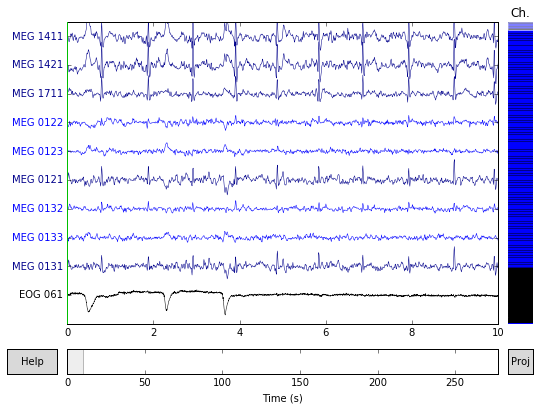

In [49]:
raw.plot(n_channels=10,order=order);

In [52]:
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs
ica = ICA(n_components=0.95,method='fastica')
picks = mne.pick_types(raw.info,meg=True,eog=True,stim=False)
ica.fit(raw,picks=picks,decim=3,reject=dict(mag=4e-12,grad=4000e-13))
ica.apply(raw)

Fitting ICA to data using 306 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
    Rejecting  epoch based on MAG : [u'MEG 1711']
Artifact detected in [16842, 17243]
    Rejecting  epoch based on MAG : [u'MEG 1711']
Artifact detected in [23258, 23659]
    Rejecting  epoch based on MAG : [u'MEG 1411', u'MEG 1421']
Artifact detected in [28070, 28471]
    Rejecting  epoch based on MAG : [u'MEG 1411', u'MEG 1421']
Artifact detected in [37694, 38095]
    Rejecting  epoch based on MAG : [u'MEG 1411']
Artifact detected in [43709, 44110]
    Rejecting  epoch based on MAG : [u'MEG 1411']
Artifact detected in [53333, 53734]
    Rejecting  epoch based on MAG : [u'MEG 1411', u'MEG 1421']
Artifact detected in [53734, 54135]
Selection by explained variance: 129 components
Fitting ICA took 47.5s.
Transforming to ICA space (129 components)
Zeroing out 0 ICA components


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~482.3 MB, data loaded>

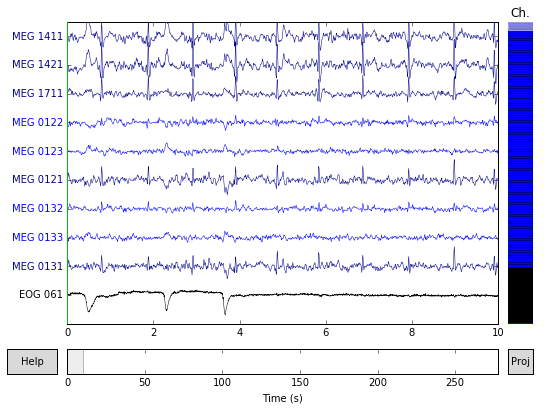

In [53]:
raw.plot(n_channels=10,order=order);